# Uber Trips Exploration Analysis

## Introduction

Analyzing how much we spend on Uber trips, knowing how many trips we have done in the month, and the user's preferred destination are questions that we can ask from the data provided by the Uber application. Exploratory data analysis is one of the first steps in data science. This initial analysis is crucial because we acquire more knowledge about the data and answer some questions before creating machine learning models.

This mini-project is organized as follows: in first part, we formulate some questions about Uber trips. In second part, we acquire and clean the data. In third section, we implement an exploratory data analysis.


*Note: You can request access to your data through the following link: https://myprivacy.uber.com/privacy/exploreyourdata/download*



## Problem Formulation

The first thing we should do before starting to manipulate and analyze data is thought about the purpose. We want to answer the following questions:

1. What is the relationship between distance, fare amount and trip duration?
2. How many completed trips were made in previous years?
3. What are the maximum, minimum, and average fare, distance and time for trips?
4. What is the total fare amount for each month and year?
5. How many trips were made each year divided by day of the week?
6. What period had the highest average fares?
7. What was the average velocity of the trips?

These are some questions we want to answer.

## Importing and Cleaning Data

In [1]:
# Modules to create a dataframe, to plot and mathematical functions.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt    
import seaborn as sns

from datetime import datetime
from datetime import timedelta

# The line magic command enables the drawing of matplotlib figures in the IPython environment.
%matplotlib inline 

*Note: Before reading the CSV file, we drop some sensitive information about the trip address.*

In [2]:
# Read the csv file.
rides = pd.read_csv("trips_data.csv")
rides.head(5)

,City,Product Type,Trip or Order Status,Request Time,Begin Trip Time,Begin Trip Lat,Begin Trip Lng,Dropoff Time,Dropoff Lat,Dropoff Lng,Distance (miles),Fare Amount,Fare Currency
0,Natal,UberX,DRIVER_CANCELED,2023-02-21 03:14:26 +0000 UTC,1970-01-01 00:00:00 +0000 UTC,-5.875140,-35.178310,1970-01-01 00:00:00 +0000 UTC,-5.872130,-35.180290,0.00,3.00,BRL
1,Natal,UberX,CANCELED,2023-02-21 03:11:53 +0000 UTC,1970-01-01 00:00:00 +0000 UTC,NaN,NaN,1970-01-01 00:00:00 +0000 UTC,NaN,NaN,0.00,0.00,BRL
2,Natal,UberX,COMPLETED,2023-02-20 20:50:45 +0000 UTC,2023-02-20 20:55:41 +0000 UTC,-5.842103,-35.205720,2023-02-20 21:05:52 +0000 UTC,-5.866020,-35.185100,3.08,10.97,BRL
3,Natal,UberX,COMPLETED,2023-02-20 02:36:45 +0000 UTC,2023-02-20 02:39:07 +0000 UTC,-5.871208,-35.180970,2023-02-20 02:49:18 +0000 UTC,-5.842228,-35.205654,4.10,13.93,BRL
4,Natal,UberX,COMPLETED,2023-02-19 02:11:29 +0000 UTC,2023-02-19 02:20:09 +0000 UTC,-5.784313,-35.200066,2023-02-19 02:30:58 +0000 UTC,-5.842238,-35.205692,4.90,24.91,BRL


In [3]:
# Irfomation about dataframe rides: index dtype and columns, non-null values and memory usage.
rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 382 entries, 0 to 381
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   City                  382 non-null    object 
 1   Product Type          381 non-null    object 
 2   Trip or Order Status  382 non-null    object 
 3   Request Time          382 non-null    object 
 4   Begin Trip Time       382 non-null    object 
 5   Begin Trip Lat        365 non-null    float64
 6   Begin Trip Lng        365 non-null    float64
 7   Dropoff Time          382 non-null    object 
 8   Dropoff Lat           365 non-null    float64
 9   Dropoff Lng           365 non-null    float64
 10  Distance (miles)      382 non-null    float64
 11  Fare Amount           382 non-null    float64
 12  Fare Currency         382 non-null    object 
dtypes: float64(6), object(7)
memory usage: 38.9+ KB


In [4]:
# Rename columns 
rides.rename(columns={'City': 'city', 'Product Type': 'product_type', 'Trip or Order Status': 'status',
                      'Request Time': 'request_time', 'Begin Trip Time': 'begin_time', 'Begin Trip Lat': 'begin_lat',
                     'Begin Trip Lng': 'begin_long', 'Dropoff Time': 'dropoff_time', 'Dropoff Lat': 'dropoff_lat',
                      'Dropoff Lng': 'dropoff_long', 'Distance (miles)': 'distance_km','Fare Amount':'fare_amount'}, inplace=True)

In [5]:
# Return the first five rows of dataframe.
rides.head(5)

,city,product_type,status,request_time,begin_time,begin_lat,begin_long,dropoff_time,dropoff_lat,dropoff_long,distance_km,fare_amount,Fare Currency
0,Natal,UberX,DRIVER_CANCELED,2023-02-21 03:14:26 +0000 UTC,1970-01-01 00:00:00 +0000 UTC,-5.875140,-35.178310,1970-01-01 00:00:00 +0000 UTC,-5.872130,-35.180290,0.00,3.00,BRL
1,Natal,UberX,CANCELED,2023-02-21 03:11:53 +0000 UTC,1970-01-01 00:00:00 +0000 UTC,NaN,NaN,1970-01-01 00:00:00 +0000 UTC,NaN,NaN,0.00,0.00,BRL
2,Natal,UberX,COMPLETED,2023-02-20 20:50:45 +0000 UTC,2023-02-20 20:55:41 +0000 UTC,-5.842103,-35.205720,2023-02-20 21:05:52 +0000 UTC,-5.866020,-35.185100,3.08,10.97,BRL
3,Natal,UberX,COMPLETED,2023-02-20 02:36:45 +0000 UTC,2023-02-20 02:39:07 +0000 UTC,-5.871208,-35.180970,2023-02-20 02:49:18 +0000 UTC,-5.842228,-35.205654,4.10,13.93,BRL
4,Natal,UberX,COMPLETED,2023-02-19 02:11:29 +0000 UTC,2023-02-19 02:20:09 +0000 UTC,-5.784313,-35.200066,2023-02-19 02:30:58 +0000 UTC,-5.842238,-35.205692,4.90,24.91,BRL


In [6]:
rides.drop('Fare Currency', axis = 1, inplace = True)

In [7]:
# This code snippet detect if there are any missing values that are being represented by either '?' or blank cells.
for i in rides.columns.tolist():
    if ('?' in rides[i].tolist() or ' ' in rides[i].tolist()):
        flag = True
    else:
        flag = False
print(flag)

False


In [8]:
# Verifying if there are any NaN values.
rides.isnull().sum()

city             0
product_type     1
status           0
request_time     0
begin_time       0
begin_lat       17
begin_long      17
dropoff_time     0
dropoff_lat     17
dropoff_long    17
distance_km      0
fare_amount      0
dtype: int64

In [9]:
# Checking the single NaN value in the product_type column.
rides[rides.product_type.isnull()] 

,city,product_type,status,request_time,begin_time,begin_lat,begin_long,dropoff_time,dropoff_lat,dropoff_long,distance_km,fare_amount
35,Natal,NaN,UNFULFILLED,2022-08-24 00:40:01 +0000 UTC,1970-01-01 00:00:00 +0000 UTC,NaN,NaN,1970-01-01 00:00:00 +0000 UTC,NaN,NaN,0.0,0.0


Something strange happened in this record because the application did not correctly record the information. Therefore, we will remove this row from the dataframe

In [10]:
rides.dropna(subset = ['product_type'], inplace=True)

Now checking the NaN values of the begin_lat column which is the latitude of the beginning of the trip

In [11]:
# Checking the single NaN value in the begin_lat column.
rides[rides.begin_lat.isnull()] 

,city,product_type,status,request_time,begin_time,begin_lat,begin_long,dropoff_time,dropoff_lat,dropoff_long,distance_km,fare_amount
1,Natal,UberX,CANCELED,2023-02-21 03:11:53 +0000 UTC,1970-01-01 00:00:00 +0000 UTC,NaN,NaN,1970-01-01 00:00:00 +0000 UTC,NaN,NaN,0.00,0.00
26,Natal,UberX,CANCELED,2022-09-25 04:13:39 +0000 UTC,1970-01-01 00:00:00 +0000 UTC,NaN,NaN,1970-01-01 00:00:00 +0000 UTC,NaN,NaN,0.00,0.00
32,Natal,Moto,CANCELED,2022-08-24 00:45:15 +0000 UTC,1970-01-01 00:00:00 +0000 UTC,NaN,NaN,1970-01-01 00:00:00 +0000 UTC,NaN,NaN,0.00,0.00
33,Natal,UberX,CANCELED,2022-08-24 00:44:19 +0000 UTC,1970-01-01 00:00:00 +0000 UTC,NaN,NaN,1970-01-01 00:00:00 +0000 UTC,NaN,NaN,0.00,0.00
63,Natal,UberX,CANCELED,2022-06-10 19:51:31 +0000 UTC,1970-01-01 00:00:00 +0000 UTC,NaN,NaN,1970-01-01 00:00:00 +0000 UTC,NaN,NaN,0.00,0.00
78,Natal,UberX,CANCELED,2022-04-30 21:38:01 +0000 UTC,1970-01-01 00:00:00 +0000 UTC,NaN,NaN,1970-01-01 00:00:00 +0000 UTC,NaN,NaN,0.00,0.00
98,Natal,UberX,CANCELED,2022-03-19 15:28:11 +0000 UTC,1970-01-01 00:00:00 +0000 UTC,NaN,NaN,1970-01-01 00:00:00 +0000 UTC,NaN,NaN,0.00,0.00
110,Natal,Flash,CANCELED,2022-02-07 17:06:58 +0000 UTC,1970-01-01 00:00:00 +0000 UTC,NaN,NaN,1970-01-01 00:00:00 +0000 UTC,NaN,NaN,0.00,0.00
119,Natal,UberX,CANCELED,2022-01-23 20:10:46 +0000 UTC,1970-01-01 00:00:00 +0000 UTC,NaN,NaN,1970-01-01 00:00:00 +0000 UTC,NaN,NaN,0.00,0.00
159,Natal,UberX,CANCELED,2021-09-23 10:50:00 +0000 UTC,1970-01-01 00:00:00 +0000 UTC,NaN,NaN,1970-01-01 00:00:00 +0000 UTC,NaN,NaN,0.00,0.00


In this case, the records filled with NaN values show canceled trips.

In [12]:
# Convert the column distance (miles) in distance (km)
rides['distance_km'] = rides['distance_km']*1.60934
rides.distance_km

0       0.000000
1       0.000000
2       4.956767
3       6.598294
4       7.885766
         ...    
377     9.414639
378     4.972861
379     7.435151
380     7.370777
381    11.152726
Name: distance_km, Length: 381, dtype: float64

In [13]:
# Series containing counts of unique values of cities that occurred the rides. 
rides.city.value_counts()

Natal             331
Rio de Janeiro     50
Name: city, dtype: int64

In [14]:
# Series containing counts of unique values of product types.
rides.product_type.value_counts()

UberX    316
uberX     56
Moto       7
Flash      2
Name: product_type, dtype: int64

Different values referring to the same category, e.g., UberX is equal to uberX.

In [15]:
# Mapping the prducts types.
product_type_map = {'UberX':'UberX','uberX':'UberX', 'Flash': 'Flash', 'Moto': 'Moto'}

rides['product_type'].replace(product_type_map, inplace=True)

rides.product_type.value_counts()

UberX    372
Moto       7
Flash      2
Name: product_type, dtype: int64

In [16]:
# Frequency of trips status.
rides.status.value_counts()

COMPLETED          330
CANCELED            46
DRIVER_CANCELED      4
FARE_SPLIT           1
Name: status, dtype: int64

In [17]:
# We consider only completed trips.
rides = rides[(rides.status =='COMPLETED')]

In [18]:
# We remove '+0000 UTC' the request_time, begin_time, dropoff time
def date_convertion(df, cols):
    for col in cols:
        df[col] = df[col].apply(lambda x: x.replace(' +0000 UTC', ''))
        df[col] = pd.to_datetime(df[col])
    return df

rides = date_convertion(rides, ['request_time', 'begin_time', 'dropoff_time'])

# Obtain the year, month and weekday of request date 
rides['year'] = rides.request_time.map(lambda x: datetime.strftime(x,"%Y"))
rides['month'] = rides.request_time.map(lambda x: datetime.strftime(x,"%b"))
rides['weekday'] = rides.request_time.map(lambda x: datetime.strftime(x,"%a"))

In [19]:
# Trips finished after the midnight.
rides.loc[rides['begin_time'].dt.date != rides['dropoff_time'].dt.date]

,city,product_type,status,request_time,begin_time,begin_lat,begin_long,dropoff_time,dropoff_lat,dropoff_long,distance_km,fare_amount,year,month,weekday
126,Natal,UberX,COMPLETED,2021-12-17 23:48:12,2021-12-17 23:54:40,-5.842164,-35.205670,2021-12-18 00:04:28,-5.817965,-35.224790,4.490059,12.98,2021,Dec,Fri
143,Natal,UberX,COMPLETED,2021-10-22 23:26:36,2021-10-22 23:34:02,-5.768007,-35.264442,2021-10-23 00:00:18,-5.842208,-35.205650,13.534549,19.95,2021,Oct,Fri
213,Natal,UberX,COMPLETED,2021-02-06 23:37:49,2021-02-06 23:49:10,-5.846500,-35.241150,2021-02-07 00:05:22,-5.842153,-35.205696,8.336381,14.67,2021,Feb,Sat
280,Natal,UberX,COMPLETED,2019-06-22 23:50:13,2019-06-22 23:57:28,-5.846501,-35.241147,2019-06-23 00:12:13,-5.842250,-35.205728,8.545595,15.49,2019,Jun,Sat
340,Rio de Janeiro,UberX,COMPLETED,2018-04-07 23:39:59,2018-04-07 23:43:31,-22.894856,-43.225585,2018-04-08 00:00:32,-22.916310,-43.177612,8.642156,17.31,2018,Apr,Sat


In [20]:
# Trip duration = dropoff_hour - begin_hour
rides['trip_duration'] = (rides['dropoff_time'] - rides['begin_time']).dt.total_seconds()/60
rides

,city,product_type,status,request_time,begin_time,begin_lat,begin_long,dropoff_time,dropoff_lat,dropoff_long,distance_km,fare_amount,year,month,weekday,trip_duration
2,Natal,UberX,COMPLETED,2023-02-20 20:50:45,2023-02-20 20:55:41,-5.842103,-35.205720,2023-02-20 21:05:52,-5.866020,-35.185100,4.956767,10.97,2023,Feb,Mon,10.183333
3,Natal,UberX,COMPLETED,2023-02-20 02:36:45,2023-02-20 02:39:07,-5.871208,-35.180970,2023-02-20 02:49:18,-5.842228,-35.205654,6.598294,13.93,2023,Feb,Mon,10.183333
4,Natal,UberX,COMPLETED,2023-02-19 02:11:29,2023-02-19 02:20:09,-5.784313,-35.200066,2023-02-19 02:30:58,-5.842238,-35.205692,7.885766,24.91,2023,Feb,Sun,10.816667
6,Natal,UberX,COMPLETED,2023-02-18 15:00:53,2023-02-18 15:08:06,-5.849503,-35.205902,2023-02-18 15:11:57,-5.842223,-35.205700,1.094351,7.96,2023,Feb,Sat,3.850000
7,Natal,UberX,COMPLETED,2023-02-11 00:48:57,2023-02-11 00:53:09,-5.891581,-35.206284,2023-02-11 00:58:44,-5.883161,-35.202920,2.639318,8.98,2023,Feb,Sat,5.583333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
377,Natal,UberX,COMPLETED,2017-04-08 22:18:11,2017-04-08 22:22:28,-5.845120,-35.242632,2017-04-08 22:41:44,-5.815923,-35.204935,9.414639,17.82,2017,Apr,Sat,19.266667
378,Natal,UberX,COMPLETED,2017-03-05 21:16:45,2017-03-05 21:21:28,-5.820015,-35.234883,2017-03-05 21:34:05,-5.845123,-35.242673,4.972861,13.47,2017,Mar,Sun,12.616667
379,Natal,UberX,COMPLETED,2017-01-20 11:34:40,2017-01-20 11:35:33,-5.841982,-35.209815,2017-01-20 11:49:03,-5.845105,-35.242733,7.435151,14.48,2017,Jan,Fri,13.500000
380,Natal,UberX,COMPLETED,2017-01-20 10:04:28,2017-01-20 10:16:06,-5.845143,-35.242654,2017-01-20 10:29:21,-5.841091,-35.210669,7.370777,14.34,2017,Jan,Fri,13.250000


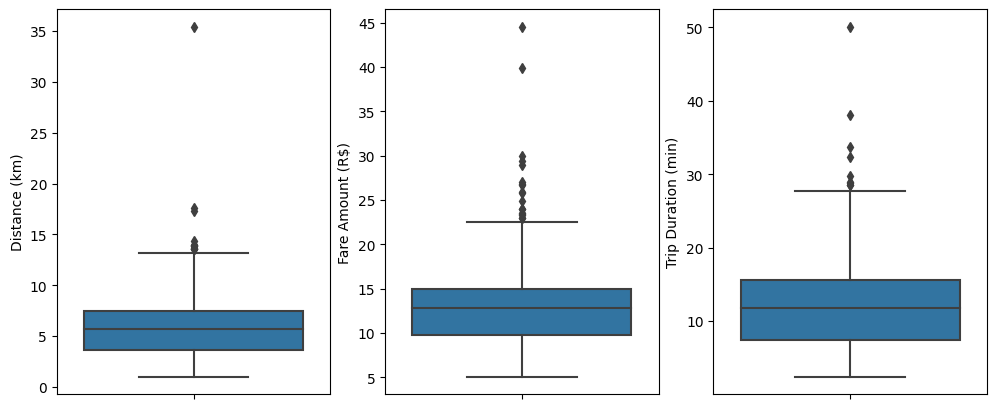

In [21]:
f, axes = plt.subplots(1, 3, figsize=(12,5))

sns.boxplot(data=rides, y = 'distance_km', ax=axes[0])
sns.boxplot(data=rides, y = 'fare_amount', ax=axes[1])
sns.boxplot(data=rides, y = 'trip_duration', ax=axes[2])

axes[0].set_ylabel('Distance (km)')
axes[1].set_ylabel('Fare Amount (R$)')
axes[2].set_ylabel('Trip Duration (min)')

plt.show()

In [22]:
# Calculating the lower and upper bounds of the interquartile range.
def outliers(df, col):
    summary = df[col].describe()
    iqr = summary.loc['75%'] - summary.loc['25%']
    lower_bound = summary.loc['25%']  - iqr * 1.5 
    upper_bound = summary.loc['75%']  + iqr * 1.5 
    return lower_bound, upper_bound

# Function to identify the outliers 
def id_outliers(df, col):
    return df.loc[df[col] > outliers(df, col)[1]]

id_outliers(rides, 'fare_amount')

,city,product_type,status,request_time,begin_time,begin_lat,begin_long,dropoff_time,dropoff_lat,dropoff_long,distance_km,fare_amount,year,month,weekday,trip_duration
4,Natal,UberX,COMPLETED,2023-02-19 02:11:29,2023-02-19 02:20:09,-5.784313,-35.200066,2023-02-19 02:30:58,-5.842238,-35.205692,7.885766,24.91,2023,Feb,Sun,10.816667
13,Natal,UberX,COMPLETED,2023-01-07 03:22:22,2023-01-07 03:24:34,-5.829017,-35.182964,2023-01-07 03:34:27,-5.855037,-35.199910,7.676552,22.95,2023,Jan,Sat,9.883333
68,Natal,UberX,COMPLETED,2022-05-22 01:21:46,2022-05-22 01:28:12,-5.784906,-35.206722,2022-05-22 01:56:44,-5.842221,-35.205673,17.638366,39.93,2022,May,Sun,28.533333
102,Natal,UberX,COMPLETED,2022-03-06 04:11:21,2022-03-06 04:18:22,-5.778776,-35.200520,2022-03-06 04:36:45,-5.842217,-35.205605,9.897441,29.96,2022,Mar,Sun,18.383333
111,Natal,UberX,COMPLETED,2022-02-06 22:01:48,2022-02-06 22:07:19,-5.820006,-35.234837,2022-02-06 22:19:52,-5.842150,-35.205673,5.906278,22.93,2022,Feb,Sun,12.550000
162,Natal,UberX,COMPLETED,2021-09-12 21:06:32,2021-09-12 21:07:36,-5.864894,-35.187380,2021-09-12 21:27:52,-5.812300,-35.205960,9.092771,25.92,2021,Sep,Sun,20.266667
246,Natal,UberX,COMPLETED,2020-01-05 01:14:06,2020-01-05 01:19:13,-5.767997,-35.264414,2020-01-05 01:44:48,-5.842244,-35.205677,13.969071,29.38,2020,Jan,Sun,25.583333
269,Rio de Janeiro,UberX,COMPLETED,2019-10-15 22:19:48,2019-10-15 22:26:46,-22.814317,-43.246715,2019-10-15 22:39:54,-22.892933,-43.219798,12.230984,23.94,2019,Oct,Tue,13.133333
281,Natal,UberX,COMPLETED,2019-06-12 22:20:53,2019-06-12 22:25:32,-5.871925,-35.179935,2019-06-12 22:41:59,-5.840661,-35.210325,6.051118,23.24,2019,Jun,Wed,16.450000
318,Rio de Janeiro,UberX,COMPLETED,2018-06-22 20:12:21,2018-06-22 20:17:36,-22.918895,-43.177158,2018-06-22 20:55:37,-22.894826,-43.225480,13.196588,26.67,2018,Jun,Fri,38.016667


## Exploratory Data Analysis 

In this part we will answer the questions that were raised at the beginning.

### Q1. What is the relationship between distance, fare amount and trip duration?

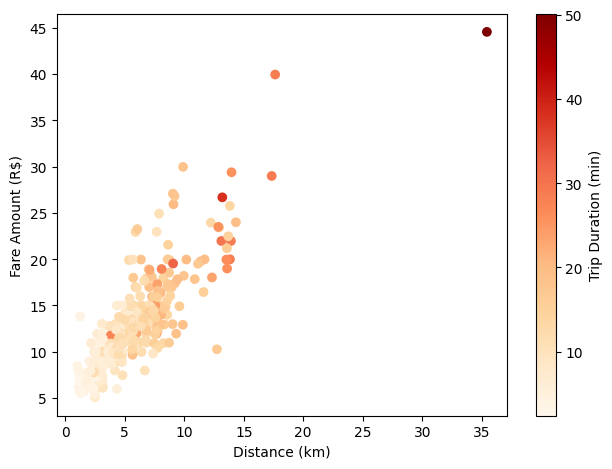

In [23]:
distance = rides['distance_km']
trip_fare = rides['fare_amount']
trip_duration = rides['trip_duration']

plt.scatter(distance, trip_fare, c = trip_duration, cmap = 'OrRd')
cbar = plt.colorbar()
cbar.set_label('Trip Duration (min)')
plt.xlabel('Distance (km)')
plt.ylabel('Fare Amount (R$)')
plt.tight_layout()
plt.show()

### Q2. How many completed trips were made in previous years?

Total trips:  330


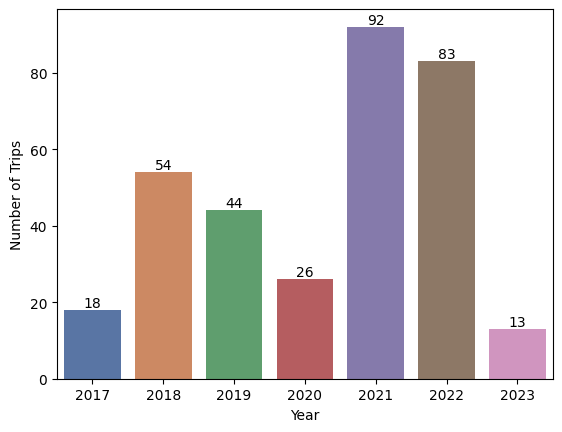

In [24]:
print('Total trips: ' , rides.status.count())

cp = sns.countplot(data=rides, x='year',order=['2017','2018','2019','2020','2021', '2022', '2023'], palette='deep')
cp.set_xlabel("Year")
cp.set_ylabel("Number of Trips")

for p in cp.patches:
    cp.annotate(format(p.get_height(), 'd'), (p.get_x() + p.get_width() / 2., p.get_height()),  ha = 'center', 
               va = 'center', xytext = (0, 5), textcoords = 'offset points')

### Q3. What are the maximum, minimum, and average fare, distance and time for trips?

In [25]:
rides.agg({'fare_amount': ['sum', 'min', 'max', 'mean'] , 'distance_km': ['sum', 'min', 'max', 'mean'], 
           'trip_duration': ['sum', 'min', 'max', 'mean']})

print('Max fare: R$', rides.fare_amount.max())
print('Min fare: R$', rides.fare_amount.min())
print('Average fare: R$', round(rides.fare_amount.mean(), 2))
print('Average distance:', round(rides.distance_km.mean(),2),'km')
print('Average fare/km:', round(rides.fare_amount.sum()/rides.distance_km.sum(),2),'R$/km')
print('Average time spent on trips:', round(rides.trip_duration.mean(),2),'min')
print('')

print('Total fare amount: R$', round(rides.fare_amount.sum(),2))
print('Total distance:',round(rides.distance_km.sum(),2),'km')
print('Total time spent on trips:',round(rides.trip_duration.sum()/60,2),'hours')

Max fare: R$ 44.54
Min fare: R$ 5.06
Average fare: R$ 13.05
Average distance: 5.98 km
Average fare/km: 2.18 R$/km
Average time spent on trips: 12.34 min

Total fare amount: R$ 4306.98
Total distance: 1972.41 km
Total time spent on trips: 67.89 hours


### Q4. What is the total fare amount for each month and year?

In [26]:
cost_table = rides.pivot_table(values='fare_amount', aggfunc='sum', columns='month', index='year')
column_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
cost_table = cost_table.reindex(column_order, axis=1)
cost_table.fillna('0')

month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
year,,,,,,,,,,,,
2017,48.31,0,13.47,65.0,40.83,21.22,13.5,0,17.75,12.74,24.77,0
2018,9.71,17.4,58.0,289.9,48.25,134.98,84.96,26.61,14.04,41.2,29.03,19.74
2019,59.22,9.61,36.6,27.94,23.62,38.73,32.72,0,49.14,64.09,75.12,162.0
2020,61.38,34.46,0,0,0,0,0,5.74,17.22,107.54,42.46,16.79
2021,32.84,26.89,12.65,30.65,0,63.16,165.64,193.3,113.97,208.17,112.86,100.78
2022,83.11,152.47,143.67,172.5,145.69,144.35,86.34,107.47,41.84,14.9,78.77,14.96
2023,83.17,81.04,0,0,0,0,0,0,0,0,0,0


### Q5. How many trips were made each year divided by day of the week?

In [27]:
cost_tableII = rides.pivot_table(values='status', aggfunc='count', columns='weekday', index='year').round(2)
column_order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
cost_tableII = cost_tableII.reindex(column_order, axis=1)
cost_tableII.fillna('0')

weekday,Mon,Tue,Wed,Thu,Fri,Sat,Sun
year,,,,,,,
2017,2.0,1.0,2.0,1.0,2.0,2.0,8.0
2018,6.0,6.0,3.0,6.0,5.0,14.0,14.0
2019,5.0,3.0,4.0,4.0,6.0,7.0,15.0
2020,4.0,3.0,1.0,5.0,2.0,6.0,5.0
2021,7.0,4.0,9.0,7.0,16.0,29.0,20.0
2022,2.0,4.0,6.0,5.0,14.0,32.0,20.0
2023,2.0,0,0,2.0,0,6.0,3.0


### Q6. What period had the highest average fares?

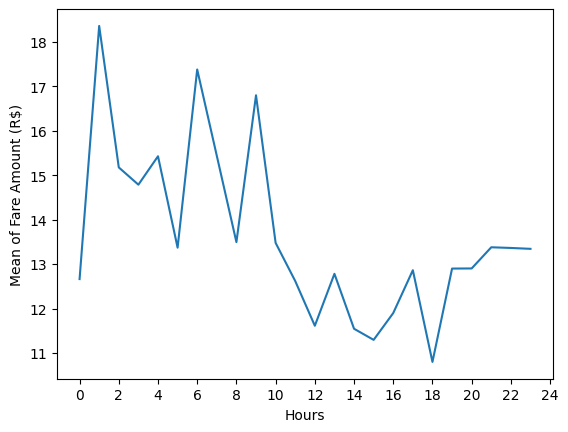

In [28]:
time = rides.groupby([rides['dropoff_time'].dt.hour])['fare_amount'].mean()

time.plot(y='fare_amount', kind='line') 

plt.xlabel('Hours')
plt.ylabel('Mean of Fare Amount (R$)')
plt.xticks(np.arange(0, 25, 2))

plt.show()

The period between 00:00 and 02:00 shows the highest average fares. These values shown in the plot can be justified by the greater movement in clubs and events that may be taking place in certain regions, but this only occurs in specific points of the city and, therefore, you will only pay more if you are within these points.

### Q7. What was the average velocity of the trips?

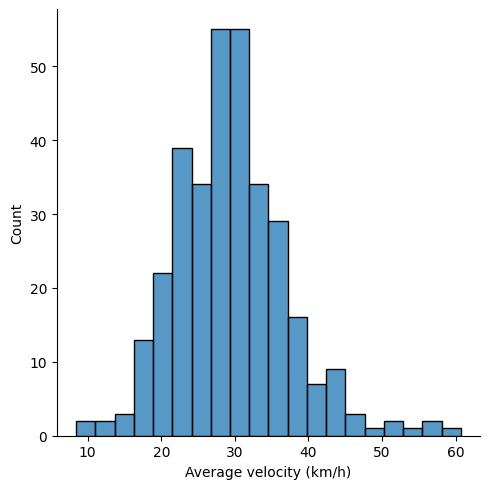

Average of average velocity is: 29.46 km/h
Average velocity maximum: 60.69 km/h
Average velocity minimum: 8.43 km/h


In [29]:
rides['velocity'] = (rides.distance_km/(rides.trip_duration/60.0))

sns.displot(rides['velocity'])
plt.xlabel('Average velocity (km/h)')
plt.show()
print('Average of average velocity is:' , round(rides['velocity'].mean(), 2), 'km/h')
print('Average velocity maximum:' , round(rides['velocity'].max(), 2), 'km/h')
print('Average velocity minimum:' , round(rides['velocity'].min(), 2), 'km/h')

## Conclusions

Let us revisit the questions and summarize our conclusion.

**Q1. What is the relationship between distance, fare amount and trip duration?**

The relationship between distance, fare value and trip duration is shown in the figure. We can conclude that the relationship between distance and fare value is linear. Perhaps a simple linear regression analysis could draw a trend line.

**Q2. How many completed trips were made in previous years?**

I made 330 trips in 6 years. See that in the peak year of the Covid-19 pandemic (2020) trips decreased compared to the previous year. But in 2021, with the relaxation of isolation, the number of trips tripled.

**Q3. What are the maximum, minimum, and average fare, distance and time for trips?**

In summary, the most expensive trip was BRL 44.54, the cheapest was BRL 5.06 and the average was BRL 13.05. The average distance was 5.98 km and the average travel time was 12.34 min. Total spending on Uber trips was BRL 4306.98.

**Q4. What is the total fare amount for each month and year? What month did you spend the most?**

The month with the highest travel expenses was October/2021.

**Q5. How many trips were made each year divided by day of the week? What day of the week did you request the most trips?**

The day of the week that most requested trips was Saturday of the year 2022.

**Q6. What period had the highest average fares?**

The period between 00:00 and 02:00 shows the highest average fares.

**Q7. What was the average velocity of the trips?**

The average velocity was 29.46 km/h, maximum was 60.69 km/h and minimum 8.43 km/h.